In [ ]:
!pip install qiskit

from qiskit import *
from qiskit.visualization import plot_histogram

In [4]:
from math import sqrt, pi


#Initialization states must be normalized, otherwise you may recieve error

#Let's try 1 & 0

initial_state = [1,0]
qc = QuantumCircuit(1)
qc.initialize(initial_state,0)
qc.draw()

┌─────────────────┐
q_0: ┤ initialize(1,0) ├
     └─────────────────┘

In [5]:
get_states = execute(qc, Aer.get_backend('statevector_simulator')).result()
print(get_states.get_statevector())

[1.+0.j 0.+0.j]


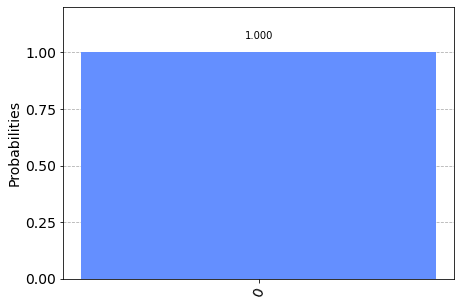

In [6]:
plot_histogram(get_states.get_counts())

# Let's try Superposition

In [7]:
qc_1 = QuantumCircuit(1)
superposition_state = [1/sqrt(2), 1/sqrt(2)]
qc_1.initialize(superposition_state,0)
qc_1.draw()

┌─────────────────────────────┐
q_0: ┤ initialize(0.70711,0.70711) ├
     └─────────────────────────────┘

In [9]:
get_superposition_states = execute(qc_1, Aer.get_backend("statevector_simulator")).result()
print(get_superposition_states.get_statevector())

[0.70710678+0.j 0.70710678+0.j]


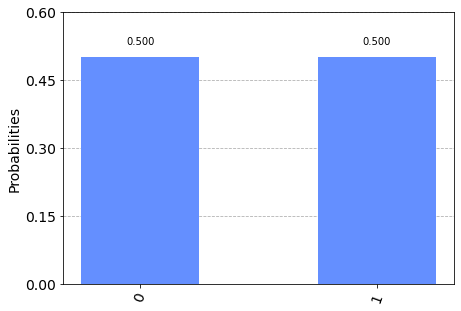

In [10]:
plot_histogram(get_superposition_states.get_counts())

# Rules of Measurement (Normalization Exercise)

Create a state vector that will give a  1/3  probability of measuring  |0⟩ .

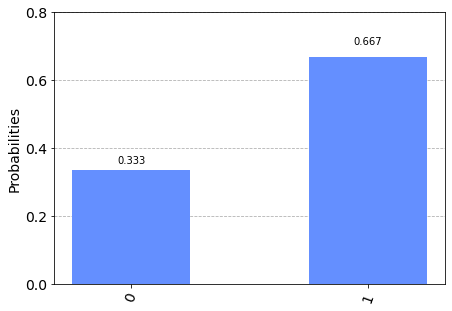

In [11]:
state_vector = [1/sqrt(3), sqrt(2)/sqrt(3)]

ex =  QuantumCircuit(1)
ex.initialize(state_vector,0)

backend = Aer.get_backend('statevector_simulator')

plot_histogram(execute(ex,backend).result().get_counts())

Create a different state vector that will give the same measurement probabilities.

**In the equation above,  |x⟩  can be any qubit state. To find the probability of measuring  |x⟩ , we take the inner product of  |x⟩  and the state we are measuring (in this case  |ψ⟩ ), then square the magnitude. This may seem a little convoluted, but it will soon become second nature.**

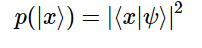

Probability of measuring |x> state for any other state is basically dot product of <x| (column vector) with the current state and then, squaring the magnitude

# Collapsing of Qubits post-measurement (Checking with Superposition)

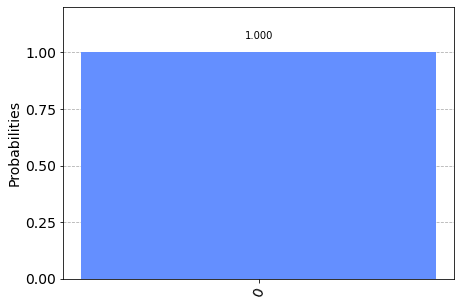

In [16]:
collapse = QuantumCircuit(1)

collapse.initialize(superposition_state,0)

collapse.measure_all()

plot_histogram(execute(collapse,backend).result().get_counts())

Yes. The qubit was initialised with superposition state-vectors, however post-measuring it, the state was collapsed - as no probabilities of 1 was found.